##  <font color="green"> Importation de data </font> 

In [12]:

################################
import sys
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt

df = pd.read_csv("data/hdf_daily.csv", names=['value'], header=0)
# print(df)
print(df.head())

                                 value
2012-12-31 00:00:00+00:00  5989.000000
2013-01-01 00:00:00+00:00  5412.687500
2013-01-02 00:00:00+00:00  6450.125000
2013-01-03 00:00:00+00:00  6668.416667
2013-01-04 00:00:00+00:00  6667.354167


##  <font color="green"> Traitement de l'information </font> 

In [13]:
#######################################
# checking for null values
print("null",df.isnull().sum())

df['value'] = df['value'].fillna(df['value'].mean())
# print(df.isnull().sum())

null value    0
dtype: int64


##  <font color="green"> Vérifier la saisonnalité </font> 

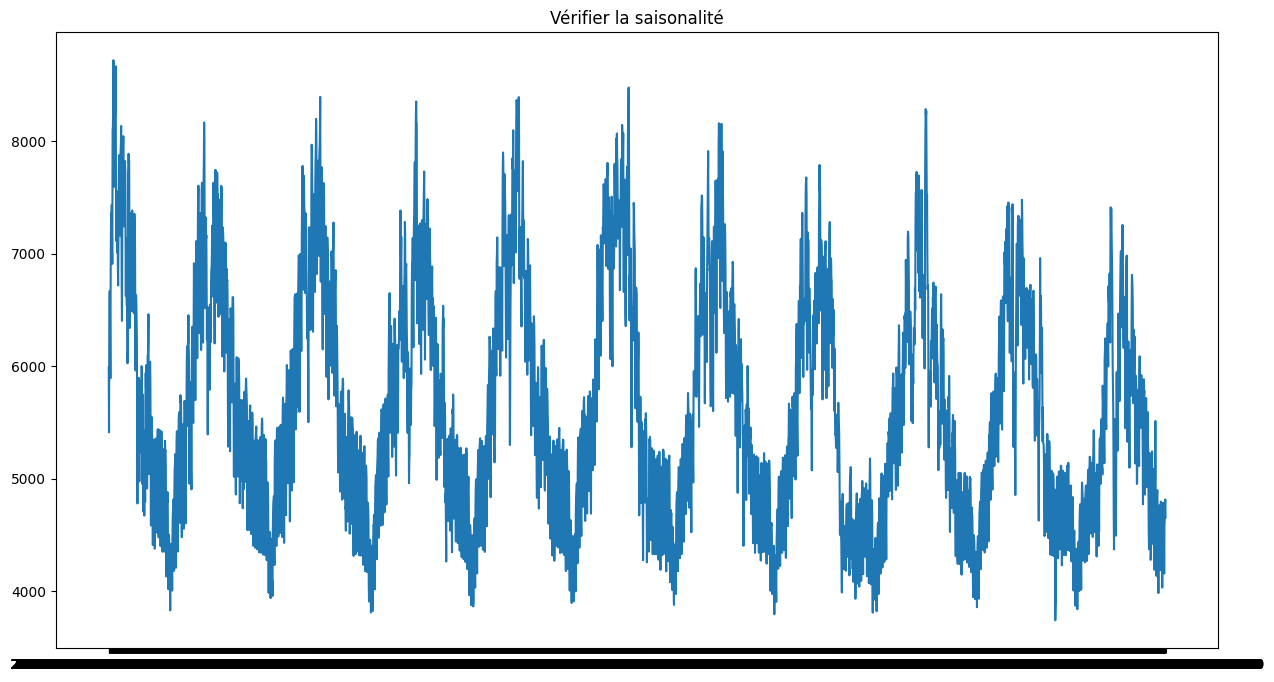

In [14]:
# #####################################
# Plot Series
plt.figure(figsize=(15,8))
plt.plot(df.value)
plt.title("Vérifier la saisonalité")
plt.show()

### Le résultat montre qu'il y a une saisonnalité dans la série, le processus de différenciation doit être associé pour le supprimer.

##  <font color="green"> Éliminer la saisonnalité </font> 

###  <font color="green"> Moving Average --- q: ACF </font> 

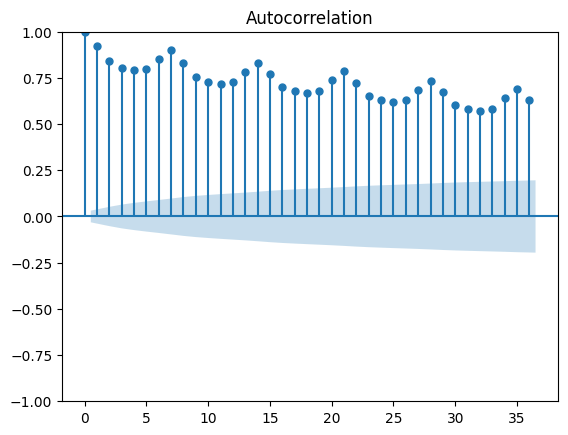

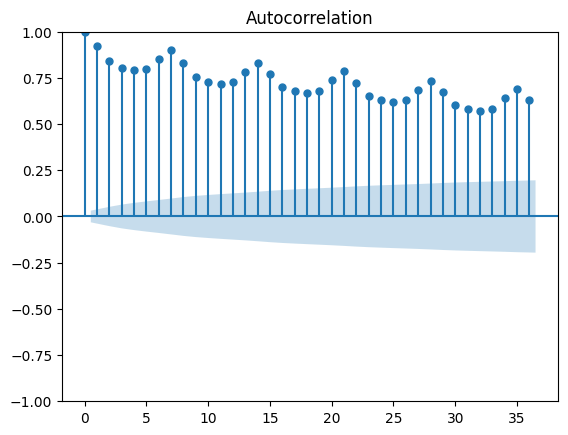

In [15]:
#importing modules
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.value)

###  <font color="green"> La première différenciation et la deuxième différenciation pour améliorer la nature stationnaire</font> 

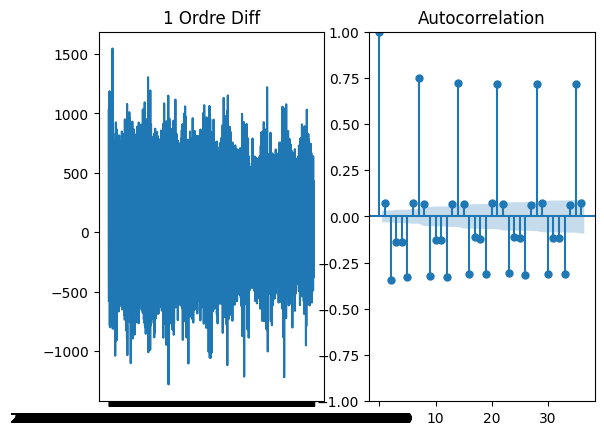

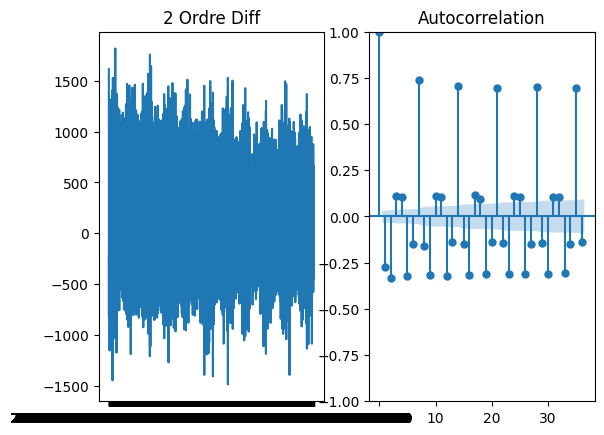

In [16]:
#1rst order differencing
f = plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1 Ordre Diff')
ax1.plot(df.value.diff())


ax2=f.add_subplot(122)
plot_acf(df.value.diff().dropna() , ax= ax2)
#plt.show()

#2nd order differencing
f = plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('2 Ordre Diff')
ax1.plot(df.value.diff().diff())

ax2=f.add_subplot(122)
plot_acf(df.value.diff().diff().dropna() , ax= ax2)
plt.show()

###  <font color="green"> Vérifier la stationarité </font> 

In [8]:
# Test ADF ##################3
from statsmodels.tsa.stattools import adfuller
# perform augmented Dickey-Fuller test
#  H0: The time series is non-stationary.
#  HA: The time series is stationary.
# Suppose Test statistic: -3.0952105155554577
# Suppose P-value: 0.026909668130736933
# Since the p-value is not less than 0.05, we fail to reject the null hypothesis.

result_diff_0  = adfuller(df.value.dropna())
print ('p_value_Diff_order_0' , result_diff_0[1]) # 0.026909668130736933


result_diff_1  = adfuller(df.value.diff().dropna())
print ('p_value_Diff_order_1' , result_diff_1[1]) # 1.17909511e-17


result_diff_2  = adfuller(df.value.diff().diff().dropna())
print ('p_value_Diff_order_2' , result_diff_2[1]) # 1.114936294e-11

p_value_Diff_order_0 0.0005713466895179795
p_value_Diff_order_1 8.218710322951256e-24
p_value_Diff_order_2 0.0
